# Starter Classes

All neccesary classes and start of project

In [1]:
#All neccesary classes for project

#general
import seaborn as sns
import scipy.stats as ss
import pandas as pd
import numpy as np
import os
import pickle

#for preprocessing
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import tensorflow as tf

#for machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#for utility packages
from Utilities.utilities import import_data
from Utilities.utilities import DataFrameSelector
from Utilities.utilities import CategoricalEncoder
from Utilities.utilities import display_scores
from Utilities.utilities import pipeline_transform

In [ ]:
#If you want to use parallel computing to see it run on a cluster that code is given here
#Make sure to use ipyparallel to start a cluster prior to running this code. 

import ipyparallel as ipp
c = ipp.Client()
c.ids
dview = c[:]

# Import the training Data

Here the data is imported

In [2]:
#Get Data

raw_data = import_data("richard_rppa_labeled_raw2.csv", "C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/raw_data").drop("Unnamed: 0", axis=1).drop("replicate", axis=1)
#raw_data_subsets = import_data("protein_list_final_final.csv")

raw_data_KRAS = raw_data.loc[raw_data["target"] == 'KRAS_'].drop("target", axis=1).reset_index().drop("index", axis=1)
raw_data_MYC = raw_data.loc[raw_data["target"] == 'MYC_'].drop("target", axis=1).reset_index().drop("index", axis=1)
raw_data_KRAS["construct"] = raw_data_KRAS["construct"].replace('si1', 'KD')
raw_data_KRAS["construct"] = raw_data_KRAS["construct"].replace('si2', 'KD')
raw_data_MYC["construct"] = raw_data_MYC["construct"].replace('si1', 'KD')
raw_data_MYC["construct"] = raw_data_MYC["construct"].replace('si2', 'KD')

raw_data_all = raw_data.drop("target", axis=1).drop("construct", axis=1)
raw_data_all

,cell.line,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
0,Pa02C,24,12406.795700,17623.709890,2895.752232,12887.327570,8973.223334,12040.122680,18676.102380,30946.03477,...,13932.782800,20723.013600,23155.79126,8708.018526,20599.037100,14661.795030,8217.324422,8839.626408,1026.592162,22471.44021
1,Pa02C,24,11510.326090,15646.460310,2134.526005,5110.229313,8160.004256,11695.970110,15398.112230,29732.62452,...,16010.495520,22247.840550,21741.98506,6522.415047,17854.305490,14086.898360,6627.611662,7684.799377,896.053265,21504.12018
2,Pa02C,24,11719.394930,17623.709890,7879.345508,3681.223477,12016.068240,13849.442410,21439.698930,27446.67381,...,15662.120930,21547.168340,20619.65478,9681.774215,15756.369290,13863.291170,6535.471984,7646.477698,709.811937,20910.35886
3,Pa02C,24,11407.199930,15898.813880,7480.089800,7398.262074,6476.917767,7465.145653,18582.952810,28001.11952,...,14100.984560,21439.698930,20557.88318,9367.489950,17606.087870,14129.212700,9376.856974,8030.484774,1164.445099,21741.98506
4,Pa02C,24,12619.516710,15568.421490,11849.016110,6317.004507,9996.597241,9136.200571,19457.743720,29732.62452,...,16432.227530,22697.265480,19970.27960,9395.628092,17085.753900,14632.488910,7585.547076,7715.605256,923.342343,20434.91407
5,Pa02C,24,12797.431670,17925.860540,7244.512282,6620.991001,9461.627931,9480.568748,18416.459820,27722.49738,...,16187.593410,21850.948870,18958.36203,8459.118249,14185.852150,13794.146130,6721.050363,6904.993694,790.764231,20070.36420
6,Pa02C,24,11114.434910,28001.119520,27722.497380,6884.307969,10456.720020,10342.329730,20170.969630,29732.62452,...,13333.036010,20723.013600,23388.51619,14457.960960,20272.079350,14617.871760,8919.540562,8955.296120,1036.909328,22247.84055
7,Pa02C,24,11968.103440,25336.475180,15002.920720,4628.553042,7863.603705,8038.514860,16399.398290,28001.11952,...,15138.553790,20455.347960,21461.15803,10689.320390,17535.809260,14472.418200,7339.309348,7934.694180,911.416568,21611.91251
8,Pa02C,24,12136.834520,25336.475180,14400.235060,6904.993694,9779.070576,9730.296144,18788.487670,28001.11952,...,14559.521290,20475.821820,20619.65478,9662.422203,15584.004000,13918.864620,5925.381041,7244.512282,644.194008,19890.54483
9,Pa02C,24,11591.180680,24834.767990,27173.568630,9798.646868,6904.993694,7186.791558,18863.804650,28566.79273,...,13095.180520,18939.405490,23623.55756,14764.787200,19110.626140,14691.145830,9847.763916,8777.965357,1124.394666,22026.46579


# Prepare Data for Machine Learning

This work flow will break apart a training set and test set as well as put the data through a pipeline to prepare it for fitting to a model

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

for train_index, test_index in split.split(raw_data_all, raw_data_all["cell.line"]):
    strat_train = raw_data_all.loc[train_index]
    strat_test = raw_data_all.loc[test_index]


for train_index, test_index in split.split(raw_data_KRAS, raw_data_KRAS["cell.line"]):
    strat_train_KRAS = raw_data_KRAS.loc[train_index]
    strat_test_KRAS = raw_data_KRAS.loc[test_index]

for train_index, test_index in split.split(raw_data_MYC, raw_data_MYC["cell.line"]):
    strat_train_MYC = raw_data_MYC.loc[train_index]
    strat_test_MYC = raw_data_MYC.loc[test_index]
    

    
strat_train

,cell.line,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
239,HPAFII,72,10188.349000,5698.736505,1020.451008,7608.339860,5329.434042,8006.427344,6476.917767,21375.49106,...,8655.930611,4084.683723,15787.91127,7731.050788,13891.04348,8892.828212,7150.946467,3258.426693,957.188023,10614.75675
177,Pa16C,72,12456.530530,16187.593410,4783.843456,5203.049423,9191.187324,7918.841798,5687.351246,19614.01861,...,6795.394339,15032.954400,15168.85900,4890.255769,13253.27043,12382.008700,6393.259650,20619.654780,775.881502,14868.50284
144,Pa14C,72,5265.862581,30638.109570,373.904264,5187.462320,7101.064849,7495.063864,20681.611990,26370.47535,...,5524.785080,5009.042477,21807.29381,29436.773230,18324.60525,13055.962910,9163.652704,21763.725960,917.818838,19830.97638
131,Pa02C,72,13426.694280,48533.034160,51021.385770,6418.888163,9209.586758,10667.954480,17997.719520,25848.29312,...,22247.840550,8901.720598,15740.61443,16399.398290,13643.24639,14676.456100,11510.326090,6594.555557,921.497638,18069.84934
17,Pa02C,24,12964.890690,14705.836250,8275.047236,8349.857343,6788.599596,6272.940073,16236.217840,21785.50938,...,14328.411950,20619.654780,15867.05032,4846.441780,11568.02316,12771.864230,6849.971555,5878.164903,714.798030,18750.95096
197,PANC1,72,7244.512282,16366.634650,15898.813880,8062.668705,7450.231362,7465.145653,10097.067020,19015.30932,...,4870.735228,14157.497350,15819.51640,6406.064145,13807.95276,12004.053330,4846.441780,11304.997720,14530.419590,15646.46031
13,Pa02C,24,13042.908200,14328.411950,35242.226780,6911.898344,8308.211304,9585.436758,21078.320530,24587.65229,...,13160.821890,21036.209060,17205.77323,7398.262074,12456.53053,12320.251760,5961.037605,5710.144556,597.049604,20070.36420
69,Pa16C,24,11214.914340,7051.531181,20994.161710,5681.669859,8527.057666,9461.627931,8054.614491,22925.38204,...,7958.536069,16122.961670,17535.80926,4812.635296,14603.25529,12848.732440,5044.228629,16949.606820,683.345064,15367.34901
198,PANC1,72,6561.664323,12926.050950,8408.511137,9471.098121,4934.465856,3398.194585,5931.306128,19732.06671,...,3789.539441,7707.890391,18196.78147,7677.122636,16932.67499,11544.911910,7368.723242,5146.126254,32859.613140,17500.77523
191,Pa16C,72,10280.456210,2445.488178,8612.757991,13711.635020,6105.834129,10006.602880,8578.378256,22247.84055,...,9528.091387,9996.597241,16663.89560,8866.187405,15662.12093,10916.168700,10363.033580,19633.650370,1660.709105,14414.64833


In [4]:
#Cell_Line
raw_train_cell = strat_train.drop("cell.line", axis=1)
train_labels_cell = pd.DataFrame(strat_train["cell.line"].copy())

raw_test_cell = strat_test.drop("cell.line", axis=1)
test_labels_cell = pd.DataFrame(strat_test["cell.line"].copy())

#KRAS_Treatment
raw_train_KRAS = strat_train_KRAS.drop("construct", axis=1)
train_labels_KRAS = pd.DataFrame(strat_train_KRAS["construct"].copy())

raw_test_KRAS = strat_test_KRAS.drop("construct", axis=1)
test_labels_KRAS = pd.DataFrame(strat_test_KRAS["construct"].copy())

#MYC_Treatment
raw_train_MYC = strat_train_MYC.drop("construct", axis=1)
train_labels_MYC = pd.DataFrame(strat_train_MYC["construct"].copy())

raw_test_MYC = strat_test_MYC.drop("construct", axis=1)
test_labels_MYC = pd.DataFrame(strat_test_MYC["construct"].copy())




raw_train_cell

,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,Chk.1.S345,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
239,72,10188.349000,5698.736505,1020.451008,7608.339860,5329.434042,8006.427344,6476.917767,21375.49106,729.967443,...,8655.930611,4084.683723,15787.91127,7731.050788,13891.04348,8892.828212,7150.946467,3258.426693,957.188023,10614.75675
177,72,12456.530530,16187.593410,4783.843456,5203.049423,9191.187324,7918.841798,5687.351246,19614.01861,12468.986440,...,6795.394339,15032.954400,15168.85900,4890.255769,13253.27043,12382.008700,6393.259650,20619.654780,775.881502,14868.50284
144,72,5265.862581,30638.109570,373.904264,5187.462320,7101.064849,7495.063864,20681.611990,26370.47535,8022.455059,...,5524.785080,5009.042477,21807.29381,29436.773230,18324.60525,13055.962910,9163.652704,21763.725960,917.818838,19830.97638
131,72,13426.694280,48533.034160,51021.385770,6418.888163,9209.586758,10667.954480,17997.719520,25848.29312,6463.977813,...,22247.840550,8901.720598,15740.61443,16399.398290,13643.24639,14676.456100,11510.326090,6594.555557,921.497638,18069.84934
17,24,12964.890690,14705.836250,8275.047236,8349.857343,6788.599596,6272.940073,16236.217840,21785.50938,6721.050363,...,14328.411950,20619.654780,15867.05032,4846.441780,11568.02316,12771.864230,6849.971555,5878.164903,714.798030,18750.95096
197,72,7244.512282,16366.634650,15898.813880,8062.668705,7450.231362,7465.145653,10097.067020,19015.30932,6406.064145,...,4870.735228,14157.497350,15819.51640,6406.064145,13807.95276,12004.053330,4846.441780,11304.997720,14530.419590,15646.46031
13,24,13042.908200,14328.411950,35242.226780,6911.898344,8308.211304,9585.436758,21078.320530,24587.65229,8578.378256,...,13160.821890,21036.209060,17205.77323,7398.262074,12456.53053,12320.251760,5961.037605,5710.144556,597.049604,20070.36420
69,24,11214.914340,7051.531181,20994.161710,5681.669859,8527.057666,9461.627931,8054.614491,22925.38204,15787.911270,...,7958.536069,16122.961670,17535.80926,4812.635296,14603.25529,12848.732440,5044.228629,16949.606820,683.345064,15367.34901
198,72,6561.664323,12926.050950,8408.511137,9471.098121,4934.465856,3398.194585,5931.306128,19732.06671,4740.982863,...,3789.539441,7707.890391,18196.78147,7677.122636,16932.67499,11544.911910,7368.723242,5146.126254,32859.613140,17500.77523
191,72,10280.456210,2445.488178,8612.757991,13711.635020,6105.834129,10006.602880,8578.378256,22247.84055,1925.614087,...,9528.091387,9996.597241,16663.89560,8866.187405,15662.12093,10916.168700,10363.033580,19633.650370,1660.709105,14414.64833


In [5]:
#Cell Line
train_cell = pipeline_transform(raw_train_cell)
test_cell = pipeline_transform(raw_test_cell)

#KRAS
train_KRAS = pipeline_transform(raw_train_KRAS)
test_KRAS = pipeline_transform(raw_test_KRAS)

#MYC
train_MYC = pipeline_transform(raw_train_MYC)
test_MYC = pipeline_transform(raw_test_MYC)


train_cell

,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,Chk.1.S345,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
0,72.0,10188.349000,5698.736505,1020.451008,7608.339860,5329.434042,8006.427344,6476.917767,21375.49106,729.967443,...,8655.930611,4084.683723,15787.91127,7731.050788,13891.04348,8892.828212,7150.946467,3258.426693,957.188023,10614.75675
1,72.0,12456.530530,16187.593410,4783.843456,5203.049423,9191.187324,7918.841798,5687.351246,19614.01861,12468.986440,...,6795.394339,15032.954400,15168.85900,4890.255769,13253.27043,12382.008700,6393.259650,20619.654780,775.881502,14868.50284
2,72.0,5265.862581,30638.109570,373.904264,5187.462320,7101.064849,7495.063864,20681.611990,26370.47535,8022.455059,...,5524.785080,5009.042477,21807.29381,29436.773230,18324.60525,13055.962910,9163.652704,21763.725960,917.818838,19830.97638
3,72.0,13426.694280,48533.034160,51021.385770,6418.888163,9209.586758,10667.954480,17997.719520,25848.29312,6463.977813,...,22247.840550,8901.720598,15740.61443,16399.398290,13643.24639,14676.456100,11510.326090,6594.555557,921.497638,18069.84934
4,24.0,12964.890690,14705.836250,8275.047236,8349.857343,6788.599596,6272.940073,16236.217840,21785.50938,6721.050363,...,14328.411950,20619.654780,15867.05032,4846.441780,11568.02316,12771.864230,6849.971555,5878.164903,714.798030,18750.95096
5,72.0,7244.512282,16366.634650,15898.813880,8062.668705,7450.231362,7465.145653,10097.067020,19015.30932,6406.064145,...,4870.735228,14157.497350,15819.51640,6406.064145,13807.95276,12004.053330,4846.441780,11304.997720,14530.419590,15646.46031
6,24.0,13042.908200,14328.411950,35242.226780,6911.898344,8308.211304,9585.436758,21078.320530,24587.65229,8578.378256,...,13160.821890,21036.209060,17205.77323,7398.262074,12456.53053,12320.251760,5961.037605,5710.144556,597.049604,20070.36420
7,24.0,11214.914340,7051.531181,20994.161710,5681.669859,8527.057666,9461.627931,8054.614491,22925.38204,15787.911270,...,7958.536069,16122.961670,17535.80926,4812.635296,14603.25529,12848.732440,5044.228629,16949.606820,683.345064,15367.34901
8,72.0,6561.664323,12926.050950,8408.511137,9471.098121,4934.465856,3398.194585,5931.306128,19732.06671,4740.982863,...,3789.539441,7707.890391,18196.78147,7677.122636,16932.67499,11544.911910,7368.723242,5146.126254,32859.613140,17500.77523
9,72.0,10280.456210,2445.488178,8612.757991,13711.635020,6105.834129,10006.602880,8578.378256,22247.84055,1925.614087,...,9528.091387,9996.597241,16663.89560,8866.187405,15662.12093,10916.168700,10363.033580,19633.650370,1660.709105,14414.64833


# Ready for Machine Learning:

At this point the data is in the proper format for training your model. Relevant variables listed below:

The Training Data:

x_train_data - The X in your model. These are what we are going to use to make predictions. 

y_train_data - The Y in your model. These are the values you are going to try and predict.

The Test Data:

x_test_data - The X data for your test data. Use this to test your completed model 

y_test_data - the Y data for your test data. Use this to test your model againt real predictions

In [6]:
X_train = train_cell
Y_train = train_labels_cell

X_test = test_cell
Y_test = test_labels_cell

In [97]:
#Fit a decision Tree

tree_clf = DecisionTreeClassifier(max_depth=150)
tree_clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=150,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [98]:
# Export the tree

export_graphviz(
    tree_clf,
    out_file="C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/RPPA_Analysis/decision_tree_cell.dot",
    feature_names=list(X_train.columns.values),
    class_names=list(map(str, tree_clf.classes_)),
    rounded=True,
    filled=True
)

os.system("dot -Tpng decision_tree_cell.dot -o decision_tree_cell.png")

0

In [ ]:
# Export the tree

export_graphviz(
    tree_clf_cell,
    out_file="C:/Users/sdgeo/Dropbox/Der Lab/Data/IremRPPA/decision_tree_cell.dot",
    feature_names=list(cell_train.columns.values),
    class_names=classes_cell,
    rounded=True,
    filled=True
)

os.system("dot -Tpng decision_tree_cell.dot -o decision_tree_cell.png")

In [99]:
pred = tree_clf.predict(X_test)
confusion_matrix(pred, Y_test)

array([[15,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  0, 14,  0,  0],
       [ 0,  0,  0, 15,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)

In [100]:
score = f1_score(pred, Y_test, average="macro")
score

1.0

# Random Forest Model with RandomSearchCV


Uses a random forest and GridSearchCV to predict the hyperparameters and generate a model

In [7]:
X_train = train_cell
Y_train = train_labels_cell

X_test = test_cell
Y_test = test_labels_cell

In [16]:
#Do a random search for best iterations

param_grid_random = {
        'n_estimators': list(range(300,400)),
        'max_features': list(range(30,150)),
    }

forest_reg_rand_clf = RandomForestClassifier(bootstrap = True)

for_random_clf = RandomizedSearchCV(forest_reg_rand_clf, param_distributions=param_grid_random,
                                n_iter=1000, cv=5, scoring='f1_macro',
                                verbose=2, n_jobs=-1, random_state=42)


for_random_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  6.7min finished
c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=1000, n_jobs=-1,
          param_distributions={'n_estimators': [300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 35...130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]},
          pre_dispatch='2*n_jobs', r

# Save Models

Use this to save any models that you have created

In [17]:
# Code to save a model

pickle.dump(for_random_clf, open('C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/models/random_forest_cell.sav', 'wb'))

In [118]:
#can load it with this code

loaded_model = pickle.load(open('C:/Users/sdgeo/Dropbox/Der Lab/Data/RichardRPPA/models/random_forest_cell.sav', 'rb'))

In [119]:
pred = loaded_model.best_estimator_.predict(X_test)
score = f1_score(pred,Y_test, average='macro')
score

1.0

# Evaluate Fits 

Test to see if the fits are good and give metrics

In [120]:
search_found = loaded_model

In [121]:
search_found.best_params_

{'max_features': 49, 'n_estimators': 335}

In [122]:

feature_importances = search_found.best_estimator_.feature_importances_
sorted(zip(feature_importances, train_cell.columns.values), reverse=True)

[(0.10705256026501833, 'GAPDH'),
 (0.08134743101875395, 'BAD.S112'),
 (0.07883072786309442, 'CrkL.Y207'),
 (0.0667754310282972, 'FHL2'),
 (0.062190802521305655, 'PKC.a.BII.T638.641'),
 (0.047704683809423394, 'Bcl.2'),
 (0.04145450612413814, 'Vimentin'),
 (0.035736708599086266, 'Bax'),
 (0.03393588280454536, 'p53.S15'),
 (0.033402836655166246, 'E.Cadherin'),
 (0.0316852452107129, 'Caspase.3'),
 (0.027995581056589454, 'Ras.GRF1.S916'),
 (0.027858996961853347, 'HSP27.S82'),
 (0.027342859715711453, 'BAD.TOTAL'),
 (0.026202787721247997, 'X4E.BP1.S65'),
 (0.022379152471382273, 'p70S6.Kinase'),
 (0.020592471287720727, 'p27.Kip1'),
 (0.017934282161909416, 'ASK1.S83'),
 (0.01717055070559334, 'CREB.S133'),
 (0.015544788090576857, 'B.Raf.S445'),
 (0.014884447271092059, 'AKT.PKB.alpha.S473'),
 (0.01155254686773402, 'eIF2alpha.S51'),
 (0.010628248179394706, 'CrKII.Y221'),
 (0.010342067437587185, 'eIF4E.S209'),
 (0.01000428269389093, 'Bak'),
 (0.008790816457917808, 'Acetyl.CoA.Carboxylase.S79'),
 (0

In [69]:
scores = cross_val_score(search_found.best_estimator_, X_train, Y_train, scoring="f1_macro", cv=5)
scores

c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\sdgeo\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\sdgeo\appdata\local\programs\pytho

array([1.        , 0.93454545, 0.83333333, 1.        , 0.92270531])

In [123]:
pred = search_found.best_estimator_.predict(X_test)
confusion_matrix(pred, Y_test)

array([[15,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0],
       [ 0,  0, 14,  0,  0],
       [ 0,  0,  0, 15,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)

In [124]:
score = f1_score(pred, Y_test, average="macro")
score

1.0

# PCA

In [85]:
pca = PCA(n_components = 4)
X2D = pca.fit_transform(X_train)

pca.explained_variance_ratio_

array([0.23531767, 0.16684979, 0.12373041, 0.10992619])

In [86]:
cumsum = np.sum(pca.explained_variance_ratio_)

In [87]:
cumsum

0.6358240617222238

# Unsupervised Learning

In [131]:

clustering_data_train = pipeline_transform(X_train, scaler=True)
clustering_data_test = pipeline_transform(X_test, scaler=True)
clustering_data_train_labels = Y_train.reset_index().drop("index", axis=1)
clustering_data_test_labels = Y_test.reset_index().drop("index", axis=1)

clustering_data_train

,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,Chk.1.S345,...,Stat6.Y641,TAB2.S372,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total
0,1.0,-0.186446,-0.823377,-0.750492,-0.027858,-1.566443,-0.574385,-0.903459,-0.597361,-2.005378,...,-0.305463,-1.023271,-0.523590,-0.301573,-0.145885,-2.198885,-0.265313,-0.996044,-0.482910,-2.206848
1,1.0,0.938219,-0.062270,-0.378803,-0.711567,0.507510,-0.611826,-1.019286,-0.959786,0.882343,...,-0.723952,0.598337,-0.759991,-0.703725,-0.381567,-0.163446,-0.617050,1.648496,-0.499155,-0.699172
2,1.0,-2.627233,0.986308,-0.814348,-0.715998,-0.614989,-0.792985,1.180328,0.430364,-0.211474,...,-1.009750,-0.886359,1.775075,2.771159,1.492494,0.229710,0.669033,1.822766,-0.486437,1.059701
3,1.0,1.419270,2.284824,4.187823,-0.365962,0.517392,0.563379,0.786609,0.322924,-0.594849,...,2.751757,-0.309793,-0.541651,0.925546,-0.237456,1.175037,1.758415,-0.487870,-0.486108,0.435496
4,-1.0,1.190287,-0.169792,-0.033996,0.182920,-0.782799,-1.315425,0.528202,-0.512999,-0.531611,...,0.970445,1.425814,-0.493368,-0.709927,-1.004334,0.063979,-0.405033,-0.596994,-0.504628,0.676902
5,1.0,-1.646131,-0.049278,0.718961,0.101286,-0.427470,-0.805775,-0.372394,-1.082971,-0.609096,...,-1.156865,0.468668,-0.511520,-0.489142,-0.176590,-0.383929,-1.335120,0.229645,0.733225,-0.423437
6,-1.0,1.228972,-0.197179,2.629403,-0.225823,0.033308,0.100619,1.238524,0.063546,-0.074721,...,0.707820,1.487512,0.017859,-0.348684,-0.675995,-0.199472,-0.817698,-0.622588,-0.515178,1.144548
7,-1.0,0.322571,-0.725214,1.222200,-0.575518,0.150840,0.047692,-0.672016,-0.278468,1.698777,...,-0.462327,0.759784,0.143893,-0.714713,0.117306,0.108821,-1.243302,1.089457,-0.507446,-0.522364
8,1.0,-1.984717,-0.298939,-0.020815,0.501635,-1.778561,-2.544337,-0.983499,-0.935497,-1.018695,...,-1.400057,-0.486618,0.396303,-0.309207,0.978120,-0.651773,-0.164216,-0.708502,2.375486,0.233797
9,1.0,-0.140775,-1.059444,-0.000642,1.707017,-1.149478,0.280661,-0.595181,-0.417874,-1.711257,...,-0.109288,-0.147625,-0.189071,-0.140879,0.508599,-1.018555,1.225814,1.498303,-0.419876,-0.860034


In [133]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(clustering_data_train)
predicted = kmeans.predict(clustering_data_test)

In [134]:
clustering_train_post = clustering_data_train.copy()
clustering_train_post["cluster"] = kmeans.labels_
clustering_train_post["cell.line"] = clustering_data_train_labels["cell.line"]

clustering_test_post = clustering_data_test.copy()
clustering_test_post["cluster"] = predicted
clustering_test_post["cell.line"] = clustering_data_test_labels["cell.line"]

clustering_test_post

,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,Chk.1.S345,...,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total,cluster,cell.line
0,-1.0,0.037927,-0.136150,0.187900,1.294498,0.357386,0.641839,-0.746105,-0.596424,0.511339,...,-1.082679,-0.887963,-0.668410,0.260701,-0.656214,-0.522683,1.317649,-0.246610,3,PANC1
1,-1.0,-1.199621,-0.701531,0.375063,-1.446307,-1.118165,-1.578103,-1.032880,1.101921,1.577096,...,1.805723,-0.695440,2.317550,0.140394,-0.545602,1.297026,-0.482831,0.028442,1,Pa16C
2,1.0,-0.030007,-0.886024,1.033750,1.555966,-1.158414,2.536520,-0.340670,-1.687651,-0.824222,...,-1.276924,-0.451735,-1.420719,-1.399448,-0.980236,-0.801268,2.635359,-0.504396,3,PANC1
3,1.0,-0.580770,-0.287357,0.026991,-0.295239,-0.082316,-0.455174,-1.022982,-0.446974,0.307508,...,-1.075637,-0.605363,-0.066637,-1.371413,0.406285,2.536250,-0.452070,0.056562,1,Pa16C
4,-1.0,0.893765,-0.107378,0.166100,-0.487159,0.805224,-0.403983,0.912468,1.040698,-0.520881,...,1.369078,-0.227928,1.044088,1.286263,-0.091491,-0.355387,-0.485701,1.453974,0,Pa02C
5,-1.0,-0.565516,-0.819721,-0.316057,-0.916804,-0.652339,-1.028940,-0.753172,-1.392932,-0.353876,...,-1.159637,-0.506315,-1.567859,-0.966992,-0.908789,-1.104684,-0.525518,-1.167965,2,HPAFII
6,1.0,-2.516022,-0.191498,-0.397158,0.582842,-1.368932,-2.461148,-0.636121,-1.292819,-0.712878,...,-0.169859,-0.418444,0.689639,-1.084860,-0.418153,-0.281215,2.448292,0.134459,3,PANC1
7,-1.0,0.158791,1.209805,-0.865760,-0.111015,0.401729,1.368667,2.038714,0.860665,1.497069,...,-0.381581,0.894018,0.753837,0.668061,1.465143,1.576110,-0.464509,0.789488,4,Pa14C
8,-1.0,-0.473036,-0.743499,-0.213168,-1.078107,0.242665,-1.041144,-0.351740,-0.971669,0.299775,...,-0.766225,-0.469558,-1.008481,-0.283899,-0.951359,-0.961766,-0.519947,-1.103612,2,HPAFII
9,1.0,0.512265,-0.561280,-0.913082,-0.201578,-1.503094,0.082120,-1.038232,-0.645158,-0.796415,...,-0.466209,-0.409685,-0.271211,-1.646737,0.073234,-0.613470,-0.481505,-0.966743,2,HPAFII


In [135]:
cluster_train_post = clustering_train_post.copy()
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['PANC1'], 3)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa02C'], 0)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa14C'], 4)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['HPAFII'], 2)
cluster_train_post["cell.line"] = cluster_train_post["cell.line"].replace(['Pa16C'], 1)

cluster_test_post = clustering_test_post.copy()
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['PANC1'], 3)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa02C'], 0)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa14C'], 4)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['HPAFII'], 2)
cluster_test_post["cell.line"] = cluster_test_post["cell.line"].replace(['Pa16C'], 1)

cluster_test_post

,time,cAbl.Y245,Acetyl.CoA.Carboxylase.S79,AKT.S473,AKT.T308,ATM.S1981,Caspase.9.Cleaved.D315,BAD.S112,Caspase.9.Cleaved.D330,Chk.1.S345,...,Tuberin.TSC2.Y1571,VASP.S157,Vav3.Y173,VEGFR.2.Y1175,Zap70.Y319.Syk.Y352,p70S6.Kinase,Vimentin,Rb.Total,cluster,cell.line
0,-1.0,0.037927,-0.136150,0.187900,1.294498,0.357386,0.641839,-0.746105,-0.596424,0.511339,...,-1.082679,-0.887963,-0.668410,0.260701,-0.656214,-0.522683,1.317649,-0.246610,3,3
1,-1.0,-1.199621,-0.701531,0.375063,-1.446307,-1.118165,-1.578103,-1.032880,1.101921,1.577096,...,1.805723,-0.695440,2.317550,0.140394,-0.545602,1.297026,-0.482831,0.028442,1,1
2,1.0,-0.030007,-0.886024,1.033750,1.555966,-1.158414,2.536520,-0.340670,-1.687651,-0.824222,...,-1.276924,-0.451735,-1.420719,-1.399448,-0.980236,-0.801268,2.635359,-0.504396,3,3
3,1.0,-0.580770,-0.287357,0.026991,-0.295239,-0.082316,-0.455174,-1.022982,-0.446974,0.307508,...,-1.075637,-0.605363,-0.066637,-1.371413,0.406285,2.536250,-0.452070,0.056562,1,1
4,-1.0,0.893765,-0.107378,0.166100,-0.487159,0.805224,-0.403983,0.912468,1.040698,-0.520881,...,1.369078,-0.227928,1.044088,1.286263,-0.091491,-0.355387,-0.485701,1.453974,0,0
5,-1.0,-0.565516,-0.819721,-0.316057,-0.916804,-0.652339,-1.028940,-0.753172,-1.392932,-0.353876,...,-1.159637,-0.506315,-1.567859,-0.966992,-0.908789,-1.104684,-0.525518,-1.167965,2,2
6,1.0,-2.516022,-0.191498,-0.397158,0.582842,-1.368932,-2.461148,-0.636121,-1.292819,-0.712878,...,-0.169859,-0.418444,0.689639,-1.084860,-0.418153,-0.281215,2.448292,0.134459,3,3
7,-1.0,0.158791,1.209805,-0.865760,-0.111015,0.401729,1.368667,2.038714,0.860665,1.497069,...,-0.381581,0.894018,0.753837,0.668061,1.465143,1.576110,-0.464509,0.789488,4,4
8,-1.0,-0.473036,-0.743499,-0.213168,-1.078107,0.242665,-1.041144,-0.351740,-0.971669,0.299775,...,-0.766225,-0.469558,-1.008481,-0.283899,-0.951359,-0.961766,-0.519947,-1.103612,2,2
9,1.0,0.512265,-0.561280,-0.913082,-0.201578,-1.503094,0.082120,-1.038232,-0.645158,-0.796415,...,-0.466209,-0.409685,-0.271211,-1.646737,0.073234,-0.613470,-0.481505,-0.966743,2,2


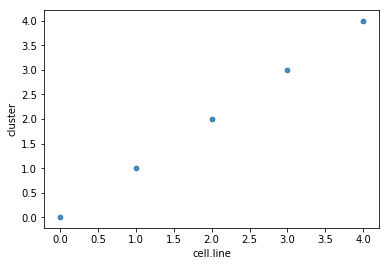

In [136]:
cluster_test_post.plot(kind="scatter", x="cell.line", y="cluster", alpha=0.1)

In [137]:
cell_corr = ss.spearmanr(cluster_test_post["cell.line"], cluster_test_post["cluster"])
cell_corr

SpearmanrResult(correlation=1.0, pvalue=0.0)

# DNN

Here we will build a 2 layer neural network and see what the best predictability possible is:

In [60]:
y_pred

array([2, 2, 3, 0, 0, 1, 3, 0, 0, 0, 2, 1, 0, 3, 2, 1, 1, 1, 2, 0, 1, 3,
       1, 2, 1, 1, 3, 1, 3, 2, 3, 0, 0, 3, 2, 3, 3, 1, 2, 2, 2, 0, 2, 2,
       1, 2, 0, 2, 2, 1, 0, 3, 3, 0, 1, 3, 1, 0, 1, 1, 2, 0, 0, 3, 3, 3,
       0, 2, 0, 0, 2, 1, 0, 1, 3, 1, 0, 1, 3, 0, 3, 3, 2, 3, 2, 2, 3, 2,
       2, 0, 0, 3, 3, 1, 0, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3, 2, 1, 3, 2, 0,
       0, 1, 3, 1, 3, 2, 0, 3, 3, 1], dtype=int64)

In [61]:
confusion_matrix(y_pred, raw_test_labels_tensor_final)

array([[30,  1,  0,  0],
       [ 1, 27,  0,  0],
       [ 0,  1, 23,  3],
       [ 0,  1,  0, 33]], dtype=int64)

In [ ]:
# Creates a graph.
reset_graph()
with tf.device('/device:CPU:0'):
  a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
  c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

# Support Vector Machine Regressor fits

Here are going to build yet another model and find how good its fit is

In [ ]:
#test a basic model using cross_val_score

svm_reg = SVR()

svm_reg.fit(prepared_data, data_labels)
kir_scores = cross_val_score(svm_reg, prepared_data, data_labels, scoring="neg_mean_squared_error", cv=10)
svm_reg

In [ ]:
#Use random search here to optomize SVM

param_distribs = {
        'kernel': ['linear', 'rbf', 'poly'],
        'C': list(range(1,1000)),
        'gamma': expon(scale=1.0),
        'degree': list(range(1,4)),
        'coef0': [1]
    }

y_train_data_short = (y_train_data == 'Pa02C')

svm_reg = SVR()
svm_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=2000, cv=3, scoring='neg_mean_squared_error',
                                verbose=2, n_jobs=4, random_state=42)
svm_search.fit(x_train_data, y_train_data_short)

In [ ]:
svm_search.best_params_


In [ ]:
ovo_clf = OneVsOneClassifier(SVR(C=226, coef0=1, degree=1, gamma= 0.349, kernel='rbf'))

#Use random search here to optomize SVM

ovo_clf.fit(x_train_data, y_train_data)

In [ ]:
negative_mse = svm_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

In [ ]:
svm_search.best_params_

# Test the parameters you would like to see how well any regression performs

Here you can test your differnt models to see how well the model fits the test data 

In [ ]:
#prepare and select data from test set

#final_model = search_found.best_estimator_
#final_model = for_clf
#final_model = loaded_model
final_model = ovo_clf

In [ ]:
#Look at predictions rmse

final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
final_predictions = final_model.predict(x_test_data)
score = f1_score(y_test_data, final_predictions, average='macro')
print(score)

In [ ]:
#Test binary evaluation with treatment status

Y_test_cond = (Y_test > .5)
pred_cond = (final_predictions > .5 )
confusion_matrix(Y_test_cond, pred_cond)

In [ ]:
score = f1_score(Y_test_cond, pred_cond)
print(score)

In [ ]:
confusion_matrix(final_predictions, Y_test)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plot_data = pd.DataFrame(X_test_prepared)
plot_data.hist(bins=20, figsize=(40,30))
plt.show()

In [ ]:
final_predictions

In [ ]:
y_test_data